In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 100

# Data Loading

# Loading the california housing dataset CSV

```
We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).
```

In [2]:
housing = pd.read_csv("data/housing.csv")

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.shape

(20640, 10)

In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
continuous_dependent = housing.columns[:-2]

<IPython.core.display.Javascript object>


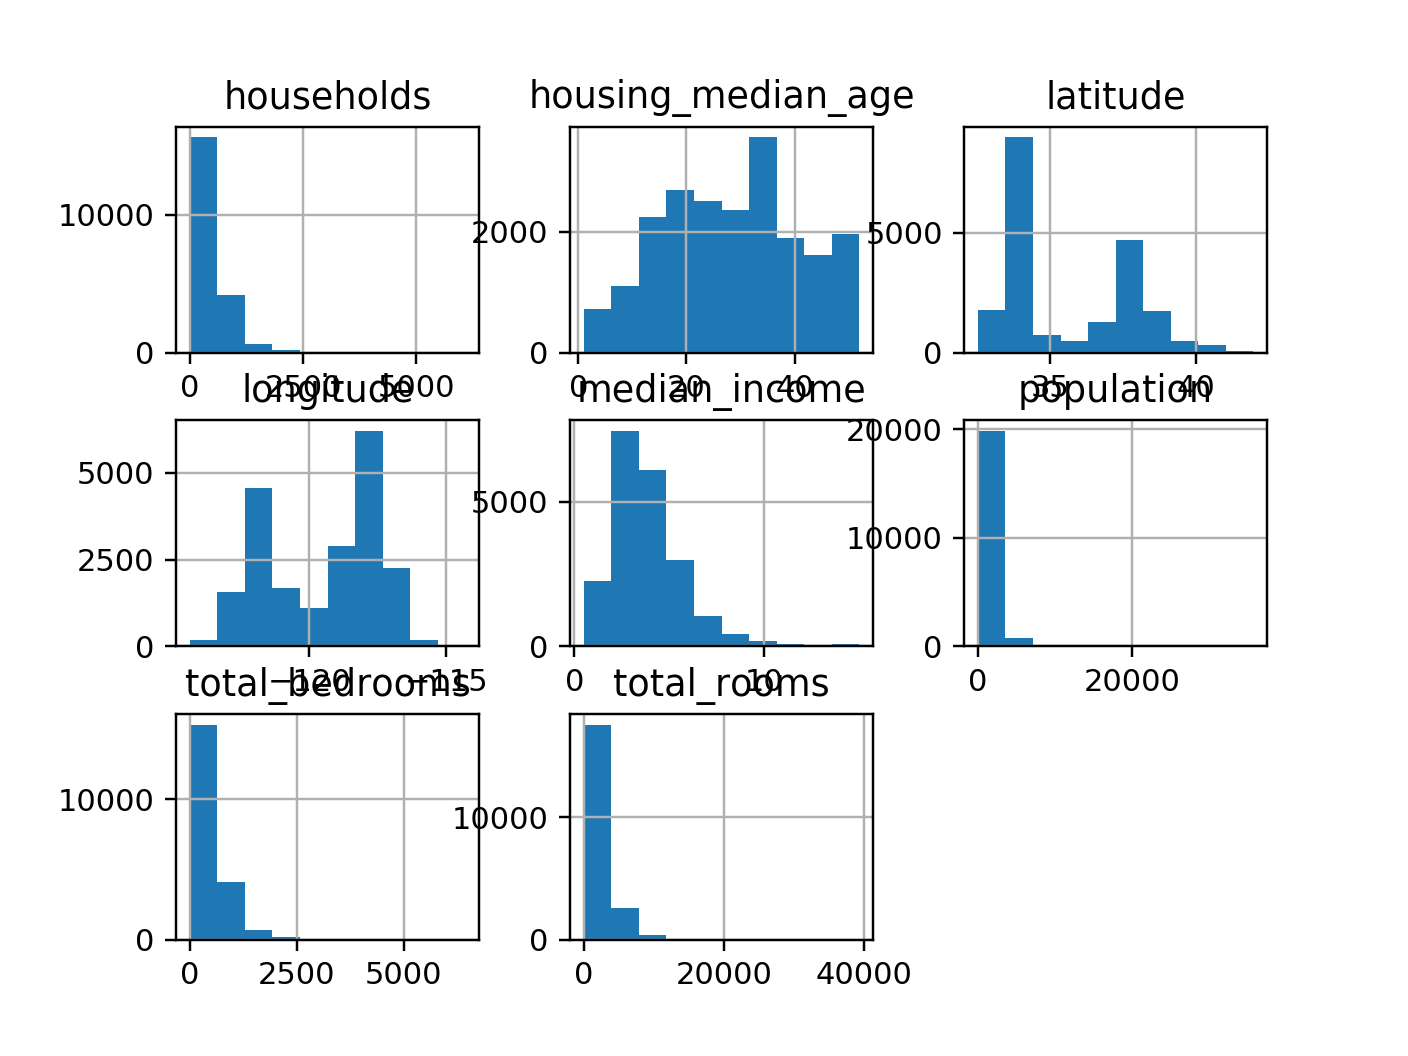

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5aa385278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a6cdda58>]], dtype=object)

In [7]:
housing[continuous_dependent].hist()

<IPython.core.display.Javascript object>


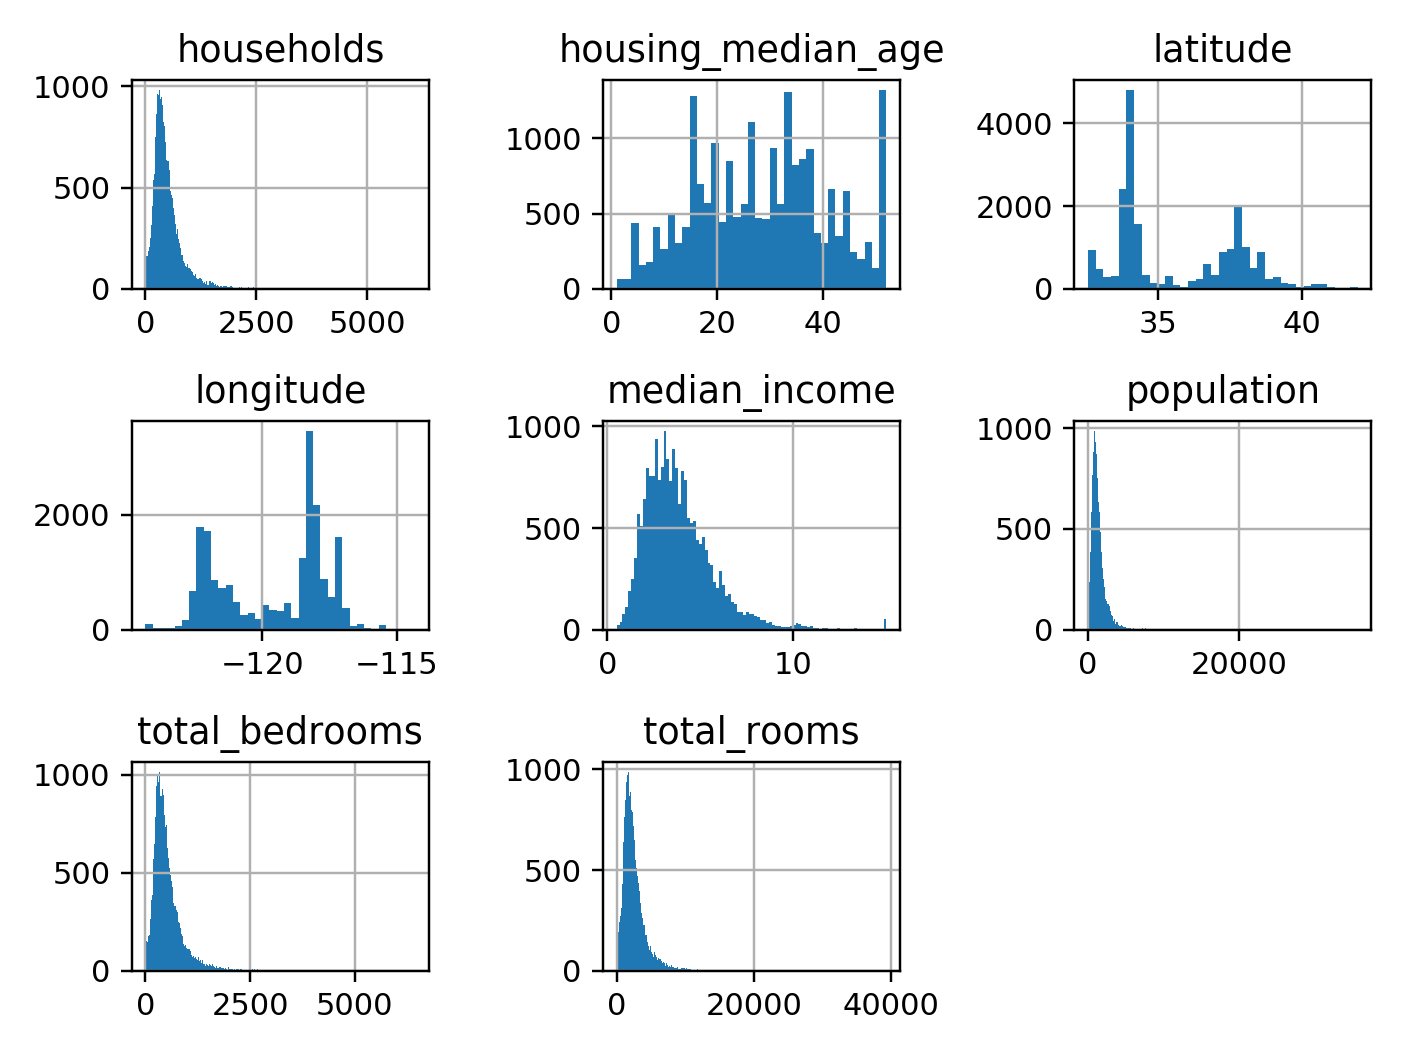

In [8]:
housing[continuous_dependent].hist(bins="auto")
plt.tight_layout()

In [9]:
housing.population.sort_values().tail()

6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: population, dtype: float64

# Exercise
Come up with a way to visualize the population data which can help us inspect the outliers.

In [46]:
# your solution here

In [ ]:
# my solution
# %load solution

<IPython.core.display.Javascript object>


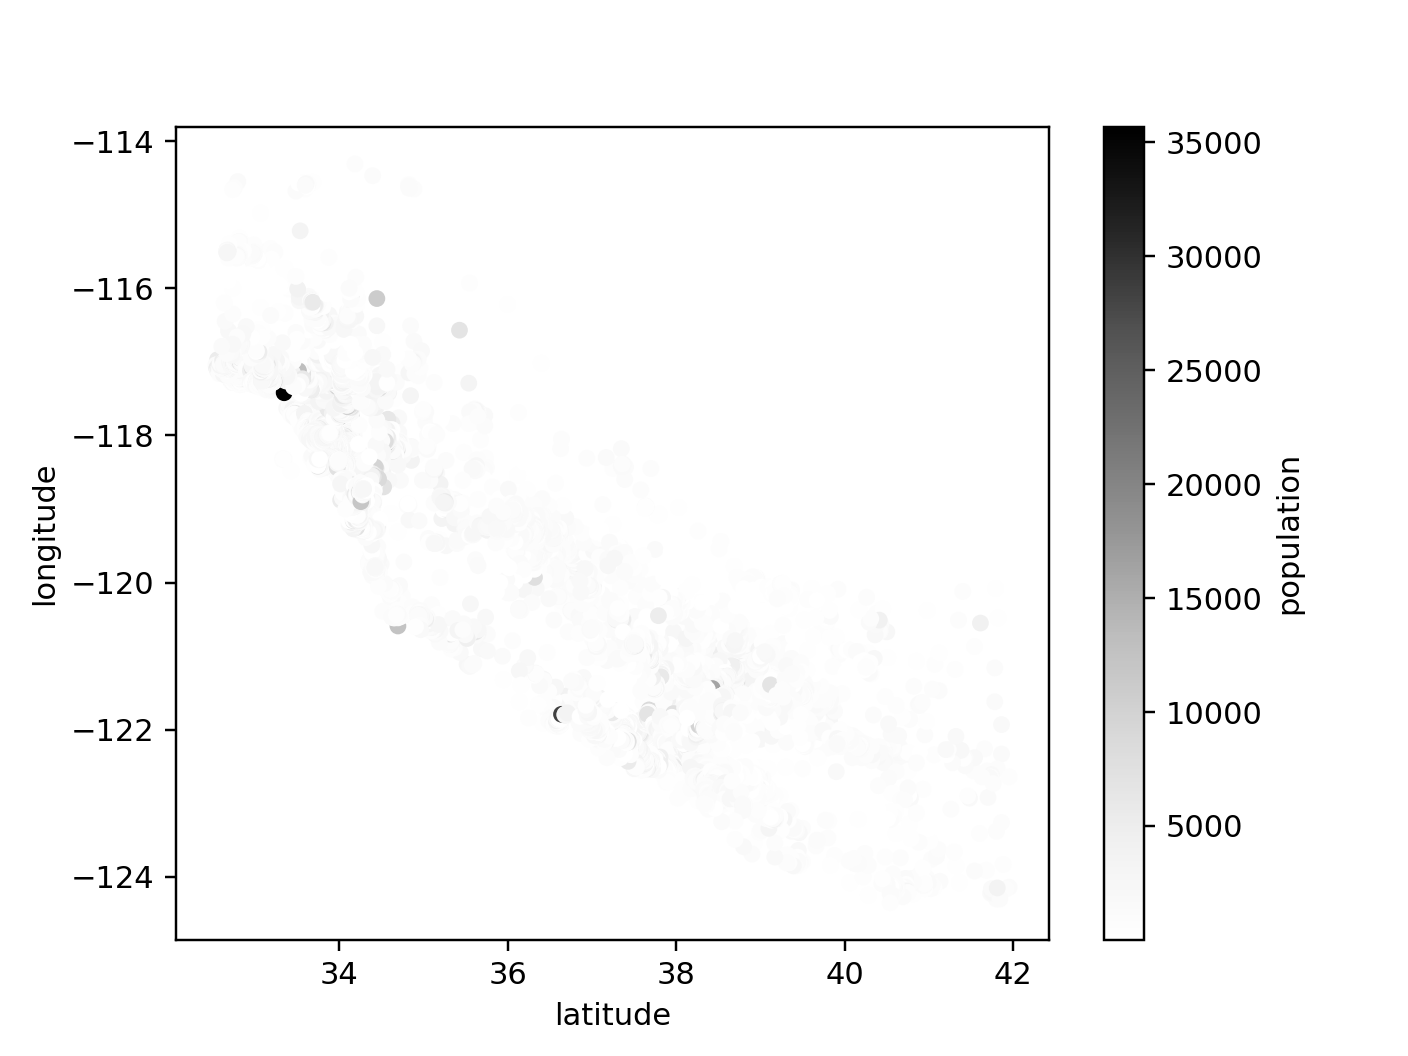

In [10]:
housing.plot(x='latitude', y='longitude', kind='scatter', c='population')

<IPython.core.display.Javascript object>


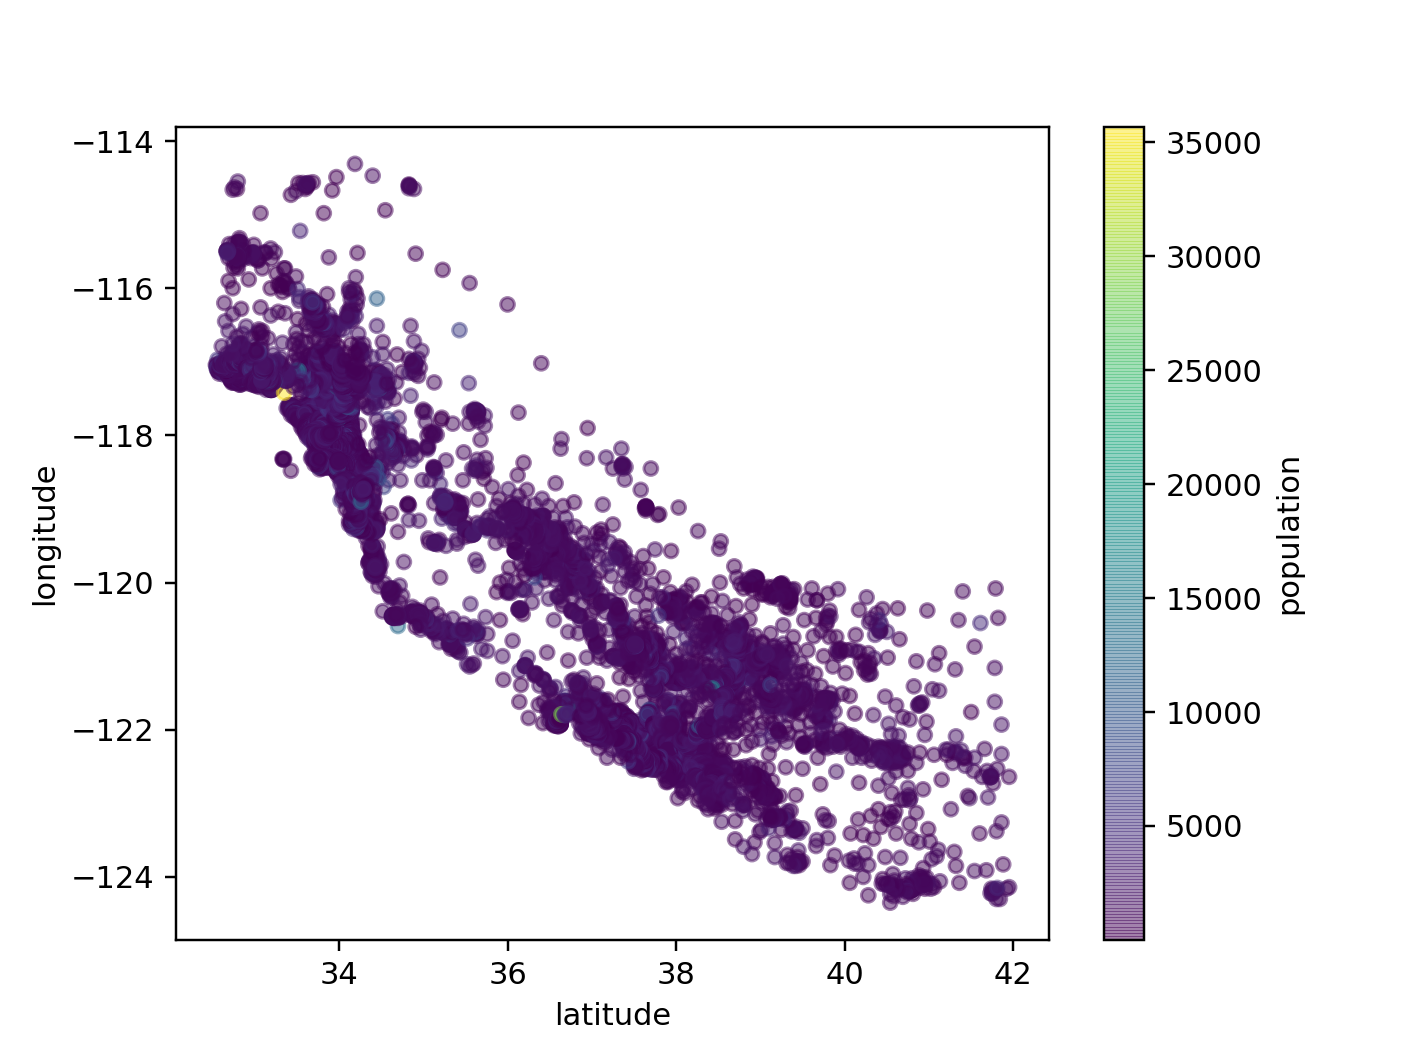

In [28]:
housing.plot(x='latitude', y='longitude', kind='scatter', c='population', alpha=.5, cmap='viridis')

# Exercise
Make a better plot! Confirm whether the outliers make sense.

In [12]:
# your solution here

In [13]:
# my solution:
# %load solutions/plot_california.py

<IPython.core.display.Javascript object>


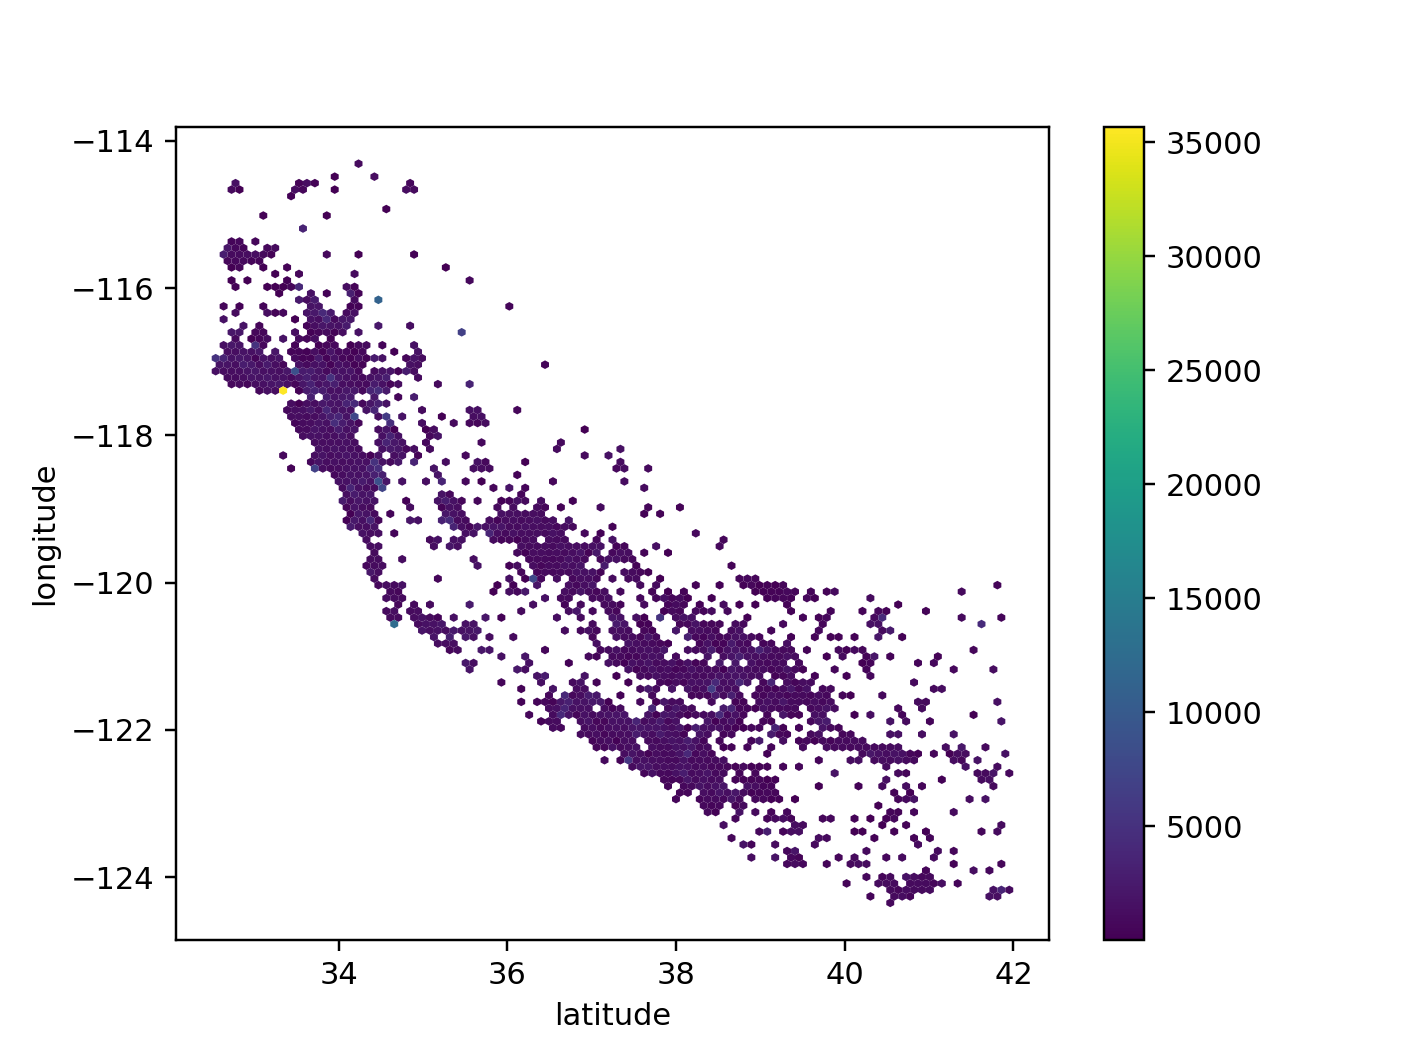

In [26]:
# could have also done kind='hexbin' but that doesn't show us a helpful docstring:
# housing.plot(x='latitude', y='longitude', kind='hexbin', C='population', cmap='viridis')
housing.plot.hexbin(x='latitude', y='longitude', C='population', cmap='viridis', linewidth=0)

<IPython.core.display.Javascript object>


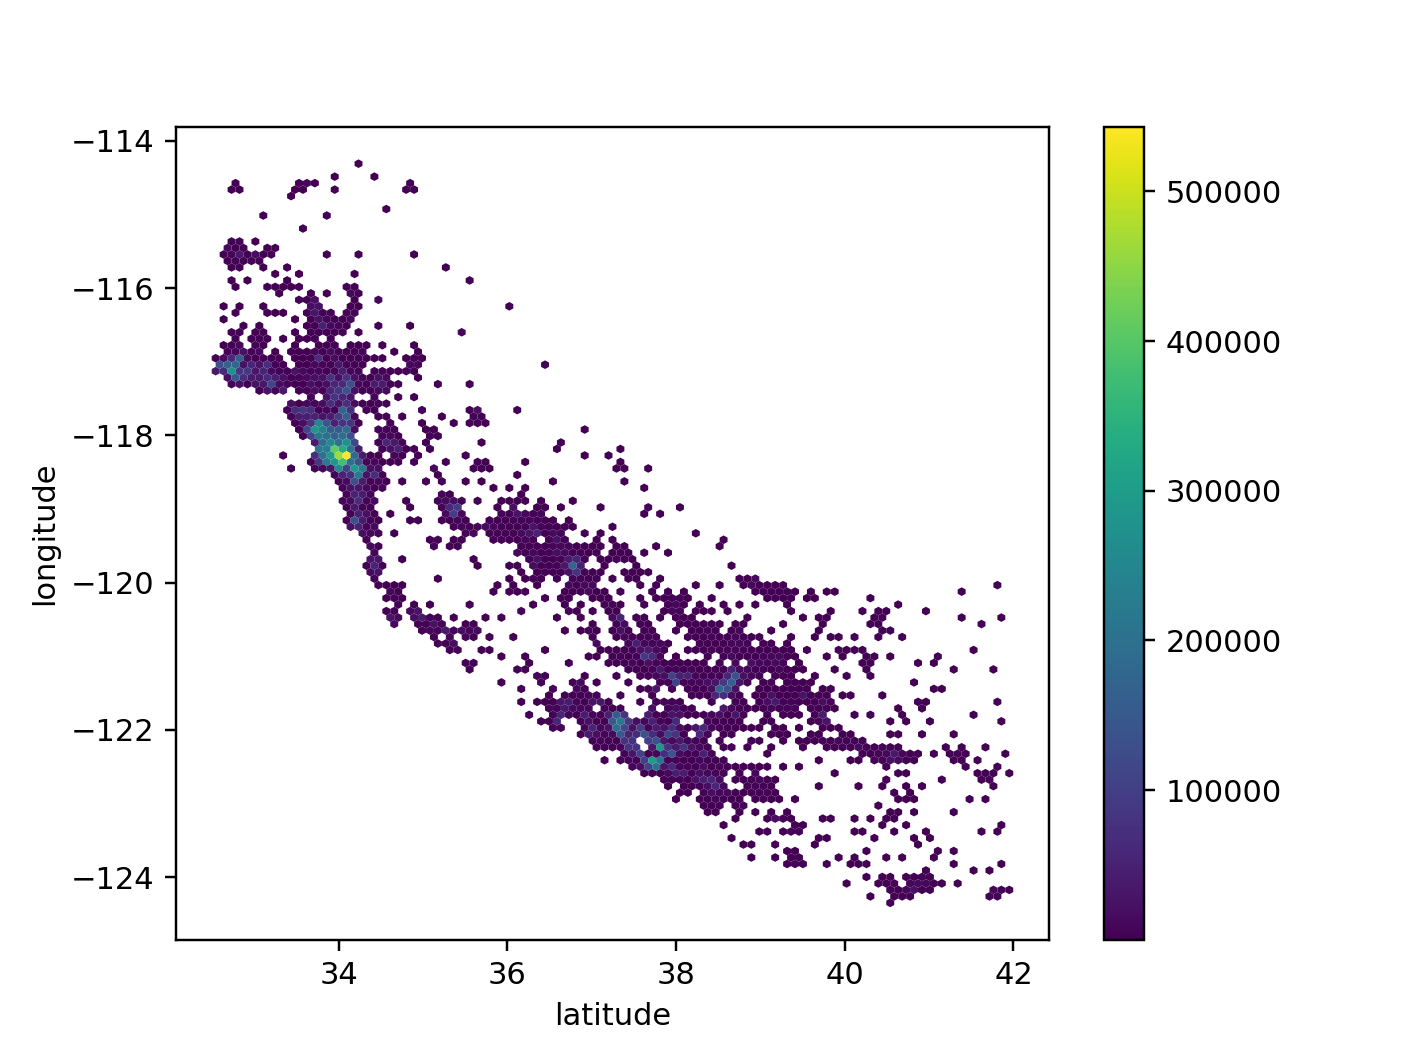

In [27]:
housing.plot.hexbin(x='latitude', y='longitude', C='population', cmap='viridis', reduce_C_function=sum, linewidth=0)

# Exercise
Create a 2 x 3 subplot grid showing housing_median_age, total_rooms, total_bedrooms, population, households and median_income
each as a hexbin.

<IPython.core.display.Javascript object>


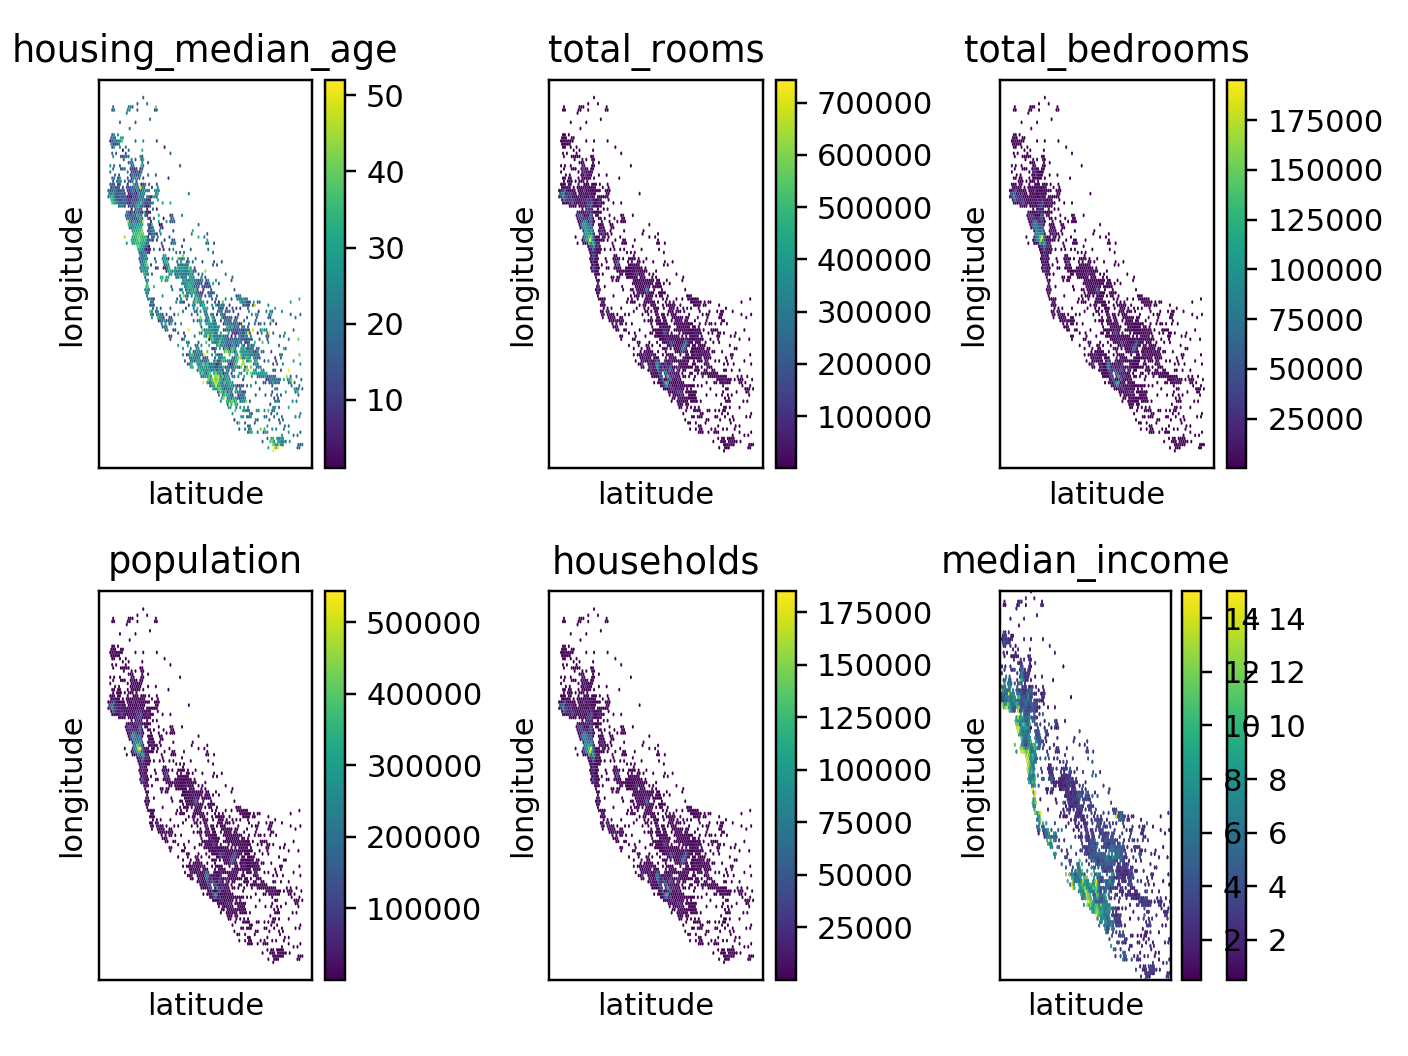

In [43]:
fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks': ()})
for column, ax in zip(housing.columns[2:-2], axes.ravel()):
    if column in ['housing_median_age', 'median_income']:
        reduce = np.mean
    else:
        reduce = np.sum
    housing.plot.hexbin(x='latitude', y='longitude', C=column, cmap='viridis', reduce_C_function=reduce, linewidth=0, ax=ax)
    ax.set_title(column)
plt.tight_layout()

<IPython.core.display.Javascript object>


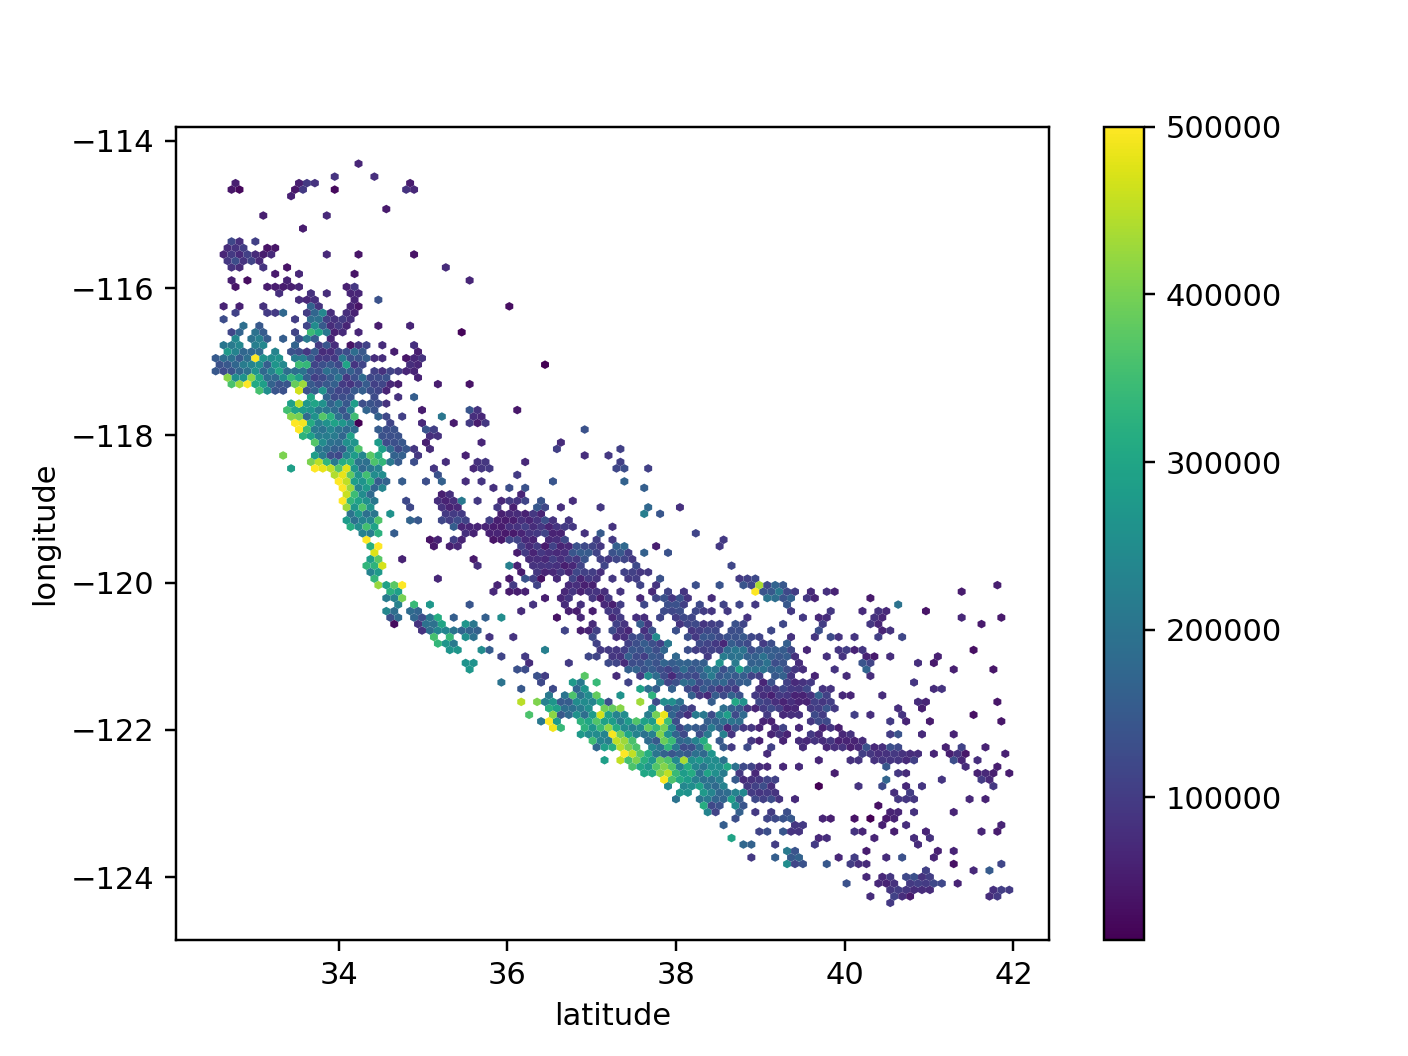

In [45]:
 housing.plot.hexbin(x='latitude', y='longitude', C='median_house_value', cmap='viridis', linewidth=0)

# Dealing with missing values a little bit

In [97]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [158]:
housing_nonull = housing.dropna().copy()

# scatter matrix / pair plot

<IPython.core.display.Javascript object>


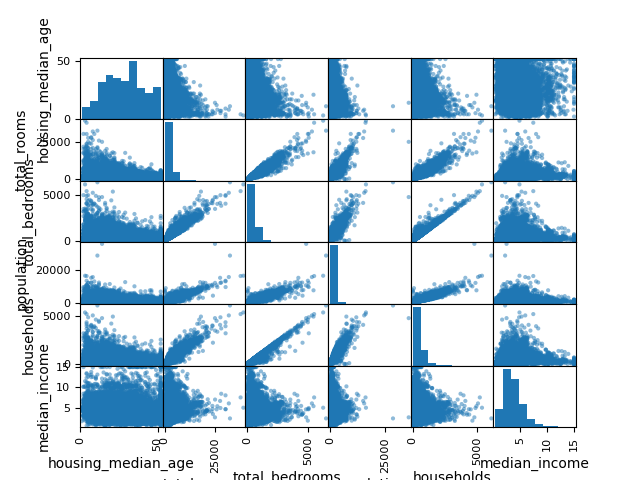

In [101]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2]);

In [104]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2], c=housing.ocean_proximity);
# error

<IPython.core.display.Javascript object>

ValueError: Invalid RGBA argument: 'NEAR BAY'

In [119]:
unique_proximity, ocean_proximity_int = np.unique(housing_nonull.ocean_proximity, return_inverse=True)
ocean_proximity_int

array([3, 3, 3, ..., 1, 1, 1])

In [121]:
unique_proximity

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

<IPython.core.display.Javascript object>


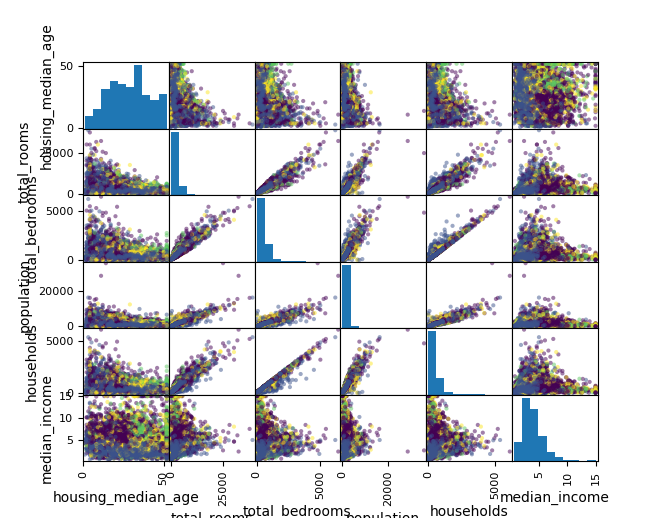

In [128]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2], c=ocean_proximity_int);

<IPython.core.display.Javascript object>


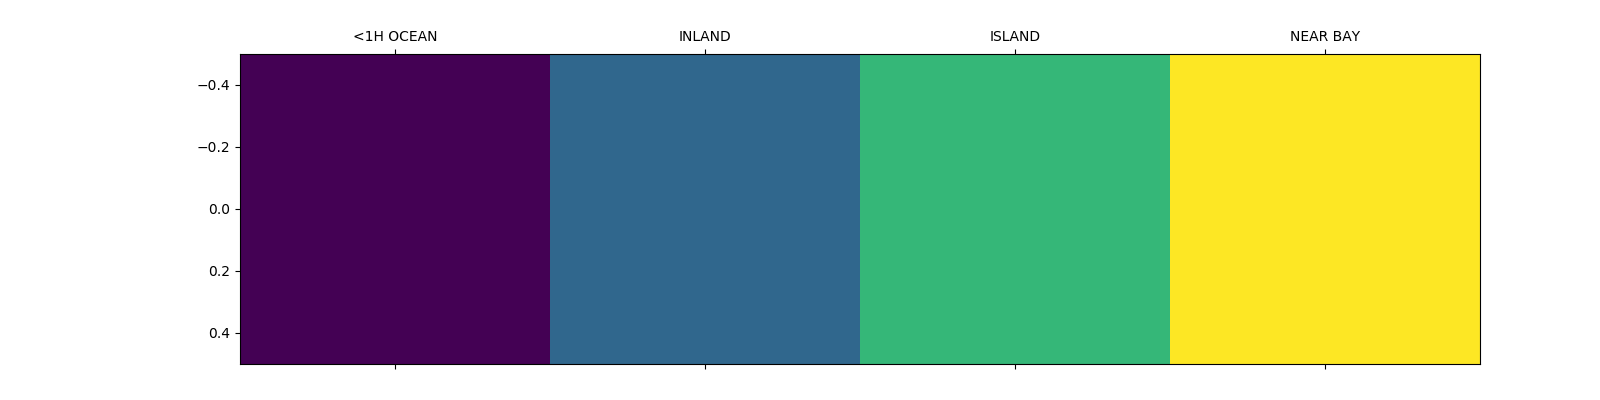

([<matplotlib.axis.XTick at 0x7fb58855cef0>,
 <a list of 4 Text xticklabel objects>)

In [126]:
plt.matshow(np.arange(4).reshape(1, 4))
plt.xticks(range(4), unique_proximity)

<IPython.core.display.Javascript object>


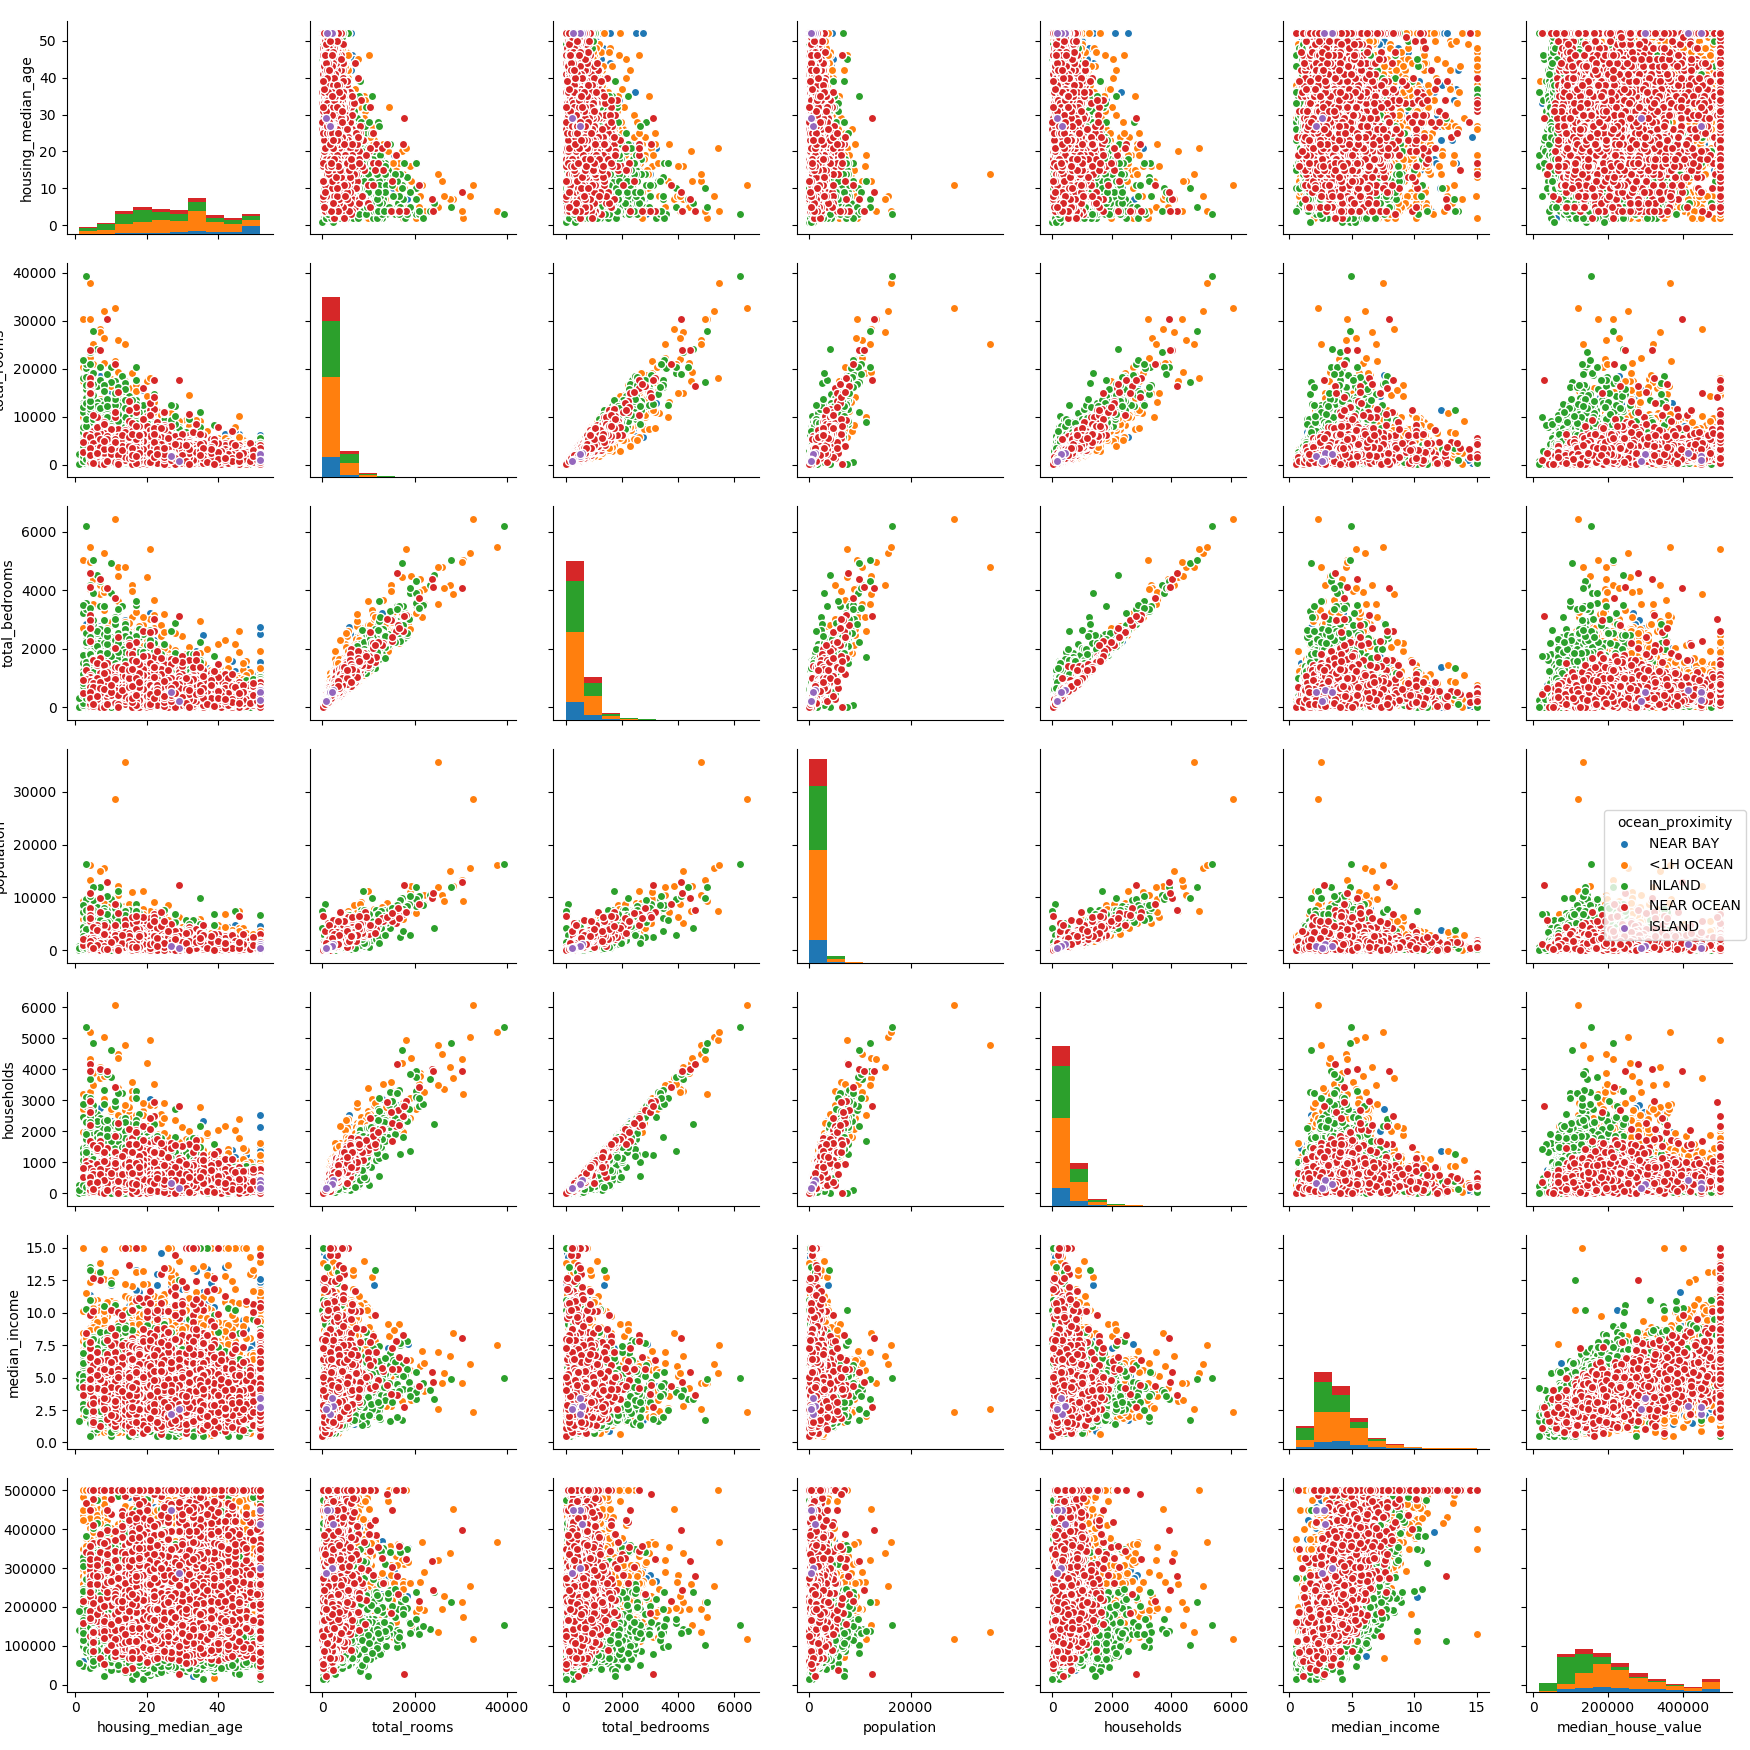

In [152]:
import seaborn.apionly as sns
sns.pairplot(housing_nonull.iloc[:, 2:], hue='ocean_proximity')

# Exercise
- Confirm the coloring of the scatter matrix makes sense by plotting latitude vs longitude colored by ocean distance.
- Are the two outliers the same for all the plots?

In [130]:
(housing_nonull.population > 20000).sum()

2

In [144]:
import matplotlib.colors as colors

<IPython.core.display.Javascript object>


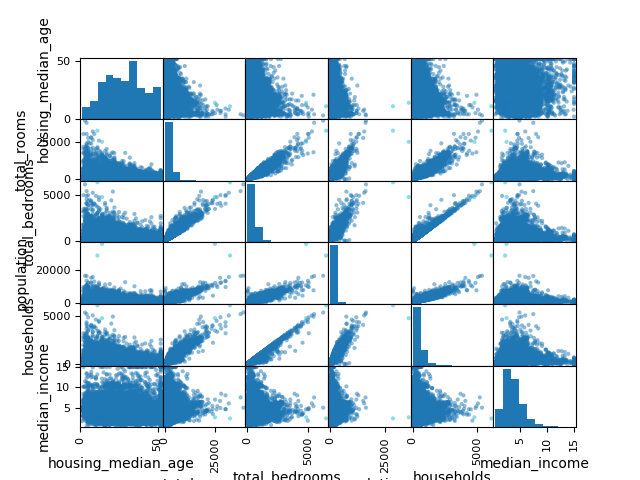

In [140]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2], c=housing_nonull.population > 20000, cmap='tab10');

<IPython.core.display.Javascript object>


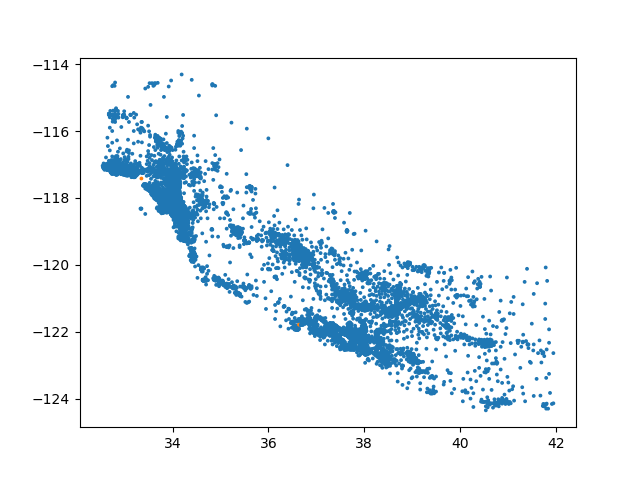

In [162]:
plt.figure()
plt.scatter(housing_nonull.latitude, housing_nonull.longitude, c=plt.cm.tab10((housing_nonull.population > 20000).astype(int)), s=3)

# The Adult Dataset
Also 1990 Census data!

In [166]:
adult = pd.read_csv("data/adult.csv", index_col=0)

In [167]:
adult.head()

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K